In [168]:
#install library
import pandas as pd

In [169]:
# Read data from csv
data = pd.read_csv('covid_data.csv')

In [170]:
# print data
data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/9/2021,5446,228,0,19
1,14/9/2021,6312,199,103325,18
2,15/9/2021,5301,189,86175,16
3,16/9/2021,5735,160,103239,14
4,17/9/2021,5972,166,0,19
...,...,...,...,...,...
105,27/12/2021,560,24,6297,-2
106,28/12/2021,671,29,6973,-3
107,29/12/2021,702,37,10981,-4
108,30/12/2021,697,30,11232,-6


In [171]:
import math
median_percent = math.floor(data.residential_percent_change_from_baseline.median())
median_percent


1

In [172]:
data.residential_percent_change_from_baseline = data.residential_percent_change_from_baseline.fillna(median_percent)
data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/9/2021,5446,228,0,19
1,14/9/2021,6312,199,103325,18
2,15/9/2021,5301,189,86175,16
3,16/9/2021,5735,160,103239,14
4,17/9/2021,5972,166,0,19
...,...,...,...,...,...
105,27/12/2021,560,24,6297,-2
106,28/12/2021,671,29,6973,-3
107,29/12/2021,702,37,10981,-4
108,30/12/2021,697,30,11232,-6


In [173]:
x= data.drop(['case_by_day','day','death_by_day'], axis=1).values
y = data[['case_by_day','death_by_day']].values

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [175]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [176]:
y_pred = ml.predict(x_test)

In [177]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8036932814208517

Text(0.5, 1.0, 'Actual vs. Predicted')

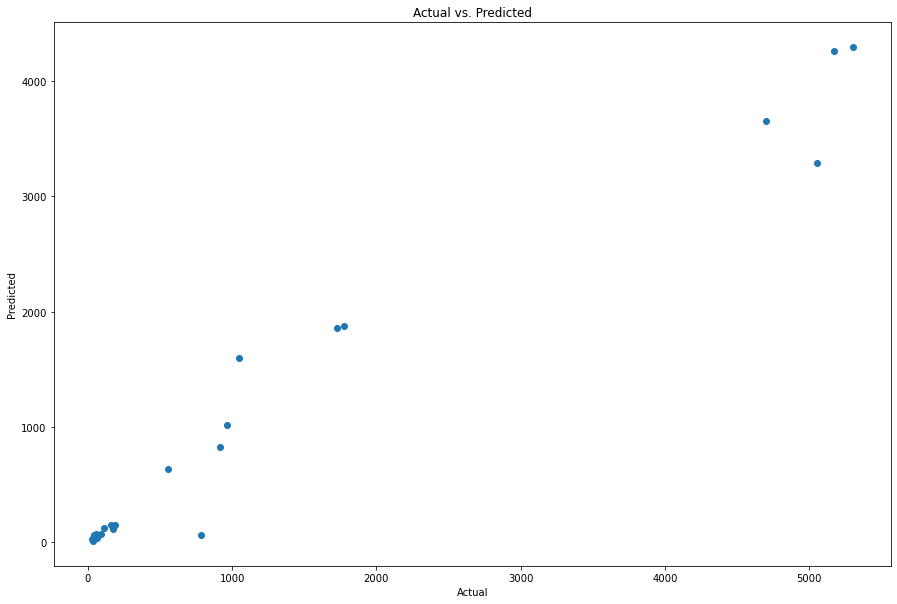

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [179]:
pred_y_df = []
for i in range(0,len(y_test)):
    pred_y_df.append(pd.DataFrame({'Actual cases':y_test[i],'Predected cases':y_pred[i], 'Difference cases': y_test[i]-y_pred[i]}, index = ["Cases by day", "Deaths by day"]))
pred_y_df


[               Actual cases  Predected cases  Difference cases
 Cases by day            965      1017.155774        -52.155774
 Deaths by day            53        42.041744         10.958256,
                Actual cases  Predected cases  Difference cases
 Cases by day           5052      3287.766341       1764.233659
 Deaths by day           175       116.538775         58.461225,
                Actual cases  Predected cases  Difference cases
 Cases by day           1773      1875.594893       -102.594893
 Deaths by day            57        68.544710        -11.544710,
                Actual cases  Predected cases  Difference cases
 Cases by day           5301      4297.189624       1003.810376
 Deaths by day           189       148.620958         40.379042,
                Actual cases  Predected cases  Difference cases
 Cases by day           1730      1857.748780       -127.748780
 Deaths by day            92        68.251174         23.748826,
                Actual cases  Prede

In [180]:
y_pred

array([[1017.15577354,   42.04174353],
       [3287.76634133,  116.53877509],
       [1875.59489305,   68.5447098 ],
       [4297.18962428,  148.62095837],
       [1857.74877964,   68.251174  ],
       [  65.57675986,   10.91099228],
       [ 634.19845071,   29.55118925],
       [4258.7578468 ,  147.98882619],
       [3651.30650444,  122.5183433 ],
       [ 823.73901433,   35.76458824],
       [1596.00153908,   60.85010775]])

In [181]:
y_test

array([[ 965,   53],
       [5052,  175],
       [1773,   57],
       [5301,  189],
       [1730,   92],
       [ 787,   34],
       [ 557,   27],
       [5171,  163],
       [4699,  113],
       [ 915,   65],
       [1046,   42]])